In [19]:
# Establece las librerias del sistema
# Manejo de datos
import pandas as pd
import numpy as np
# Maejo de directorios y archivos
import os
import glob
# Librerias de pronotiscos
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.stats.outliers_influence import summary_table
from statsmodels.tsa.seasonal import seasonal_decompose
# Advertencias del sistema
import warnings
warnings.filterwarnings('ignore')



# Funciones internas
def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [20]:
# Parametros de los archivos

categoria =  'CarnicosData'
vista = categoria + "-ini"
path = ( categoria +  '.xlsx')
xl = pd.ExcelFile(path)
fecha_inicio = '2020-03-02'
pproyeccion = 72
print(xl.sheet_names)


df2 = xl.parse('dt2')
df0 = pd.DataFrame(df2)


dir_actual = os.getcwd()

Pais = "Carnico-Centros"

path = os.path.join(dir_actual, Pais)

try:
  os.mkdir(path)
except:
  print("An exception occurred") 




['Hoja2', 'Hoja3', 'Hoja4', 'dt2', 'Hoja1', 'dt1']
An exception occurred


NN13
MAPE NN13 = 5.6529306316055505
NN14
MAPE NN14 = 19.731019035141735
NN18
MAPE NN18 = 6.552466307772914
NN20
MAPE NN20 = 8.808304740722384
NN21
MAPE NN21 = 6.278739485483379
NN24
MAPE NN24 = 5.217755763348864
NN27
MAPE NN27 = 8.418964852001464
NN29
MAPE NN29 = 5.81151245242126
NN53
MAPE NN53 = 101.84322195718431
NN97
MAPE NN97 = 7.087310936035447
NNB1
MAPE NNB1 = 51.1096020466215
NNB2
MAPE NNB2 = 15.203450275691308
NNB8
MAPE NNB8 = 7.861976551911039


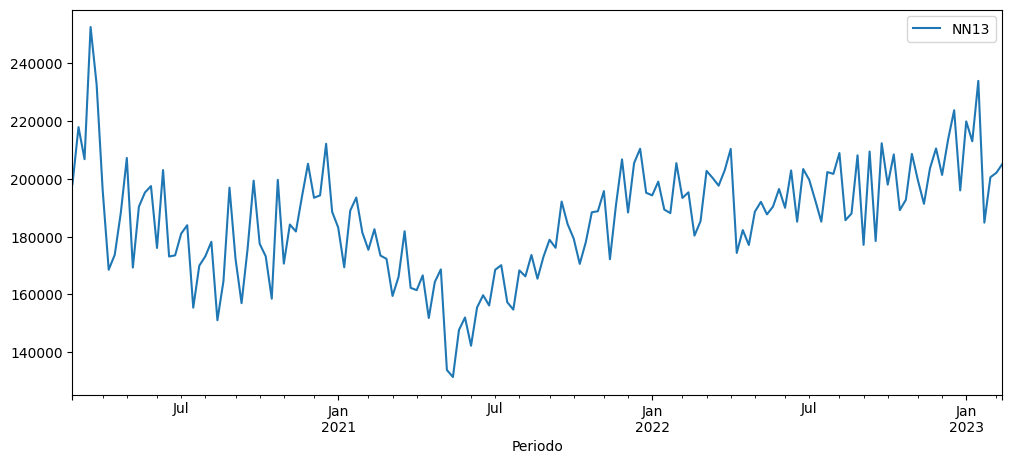

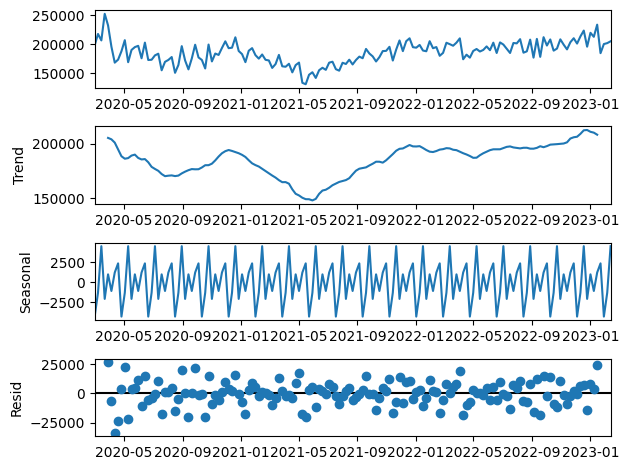

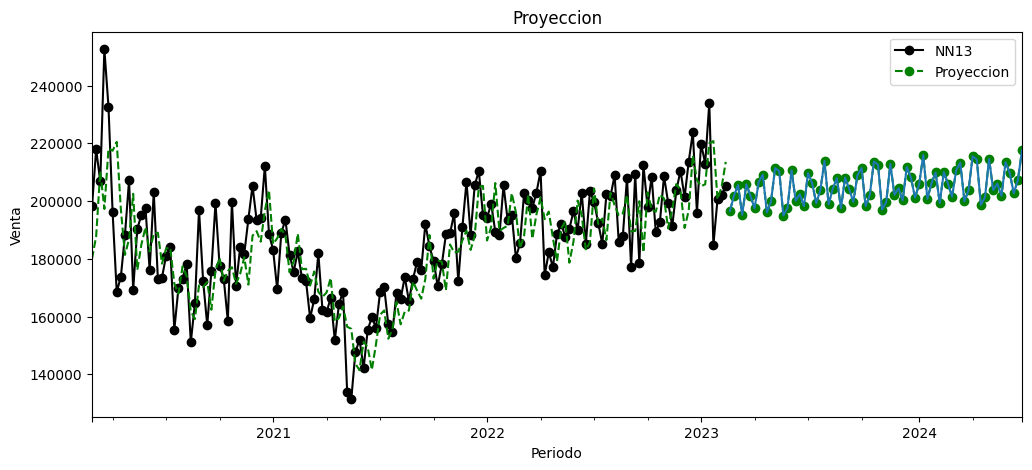

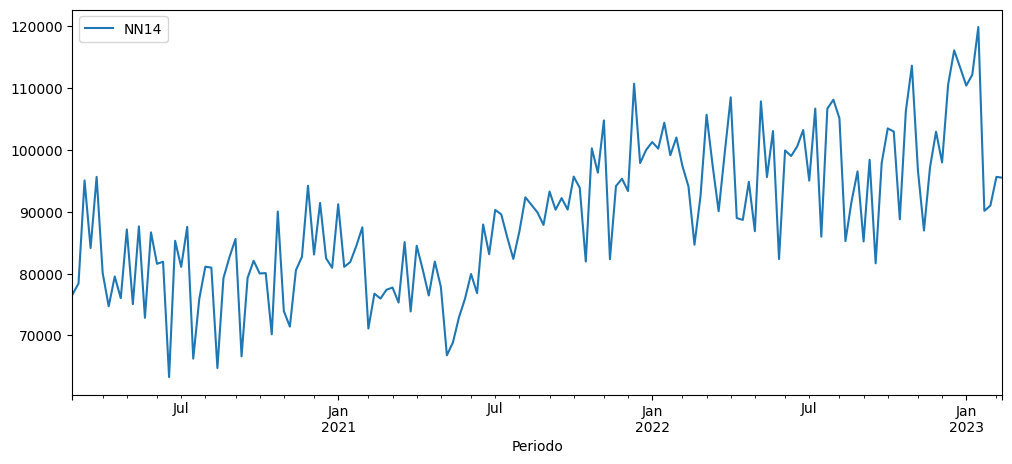

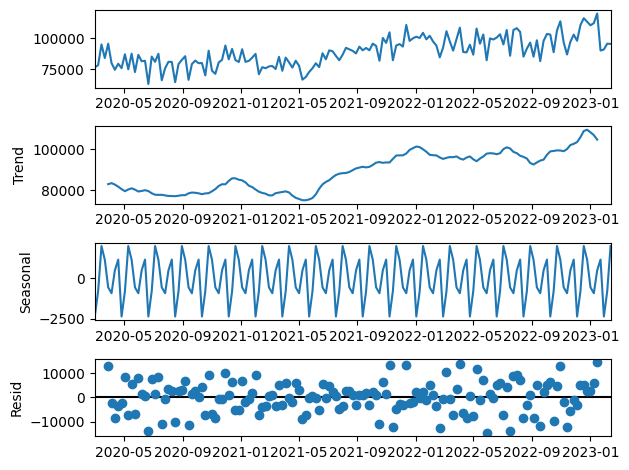

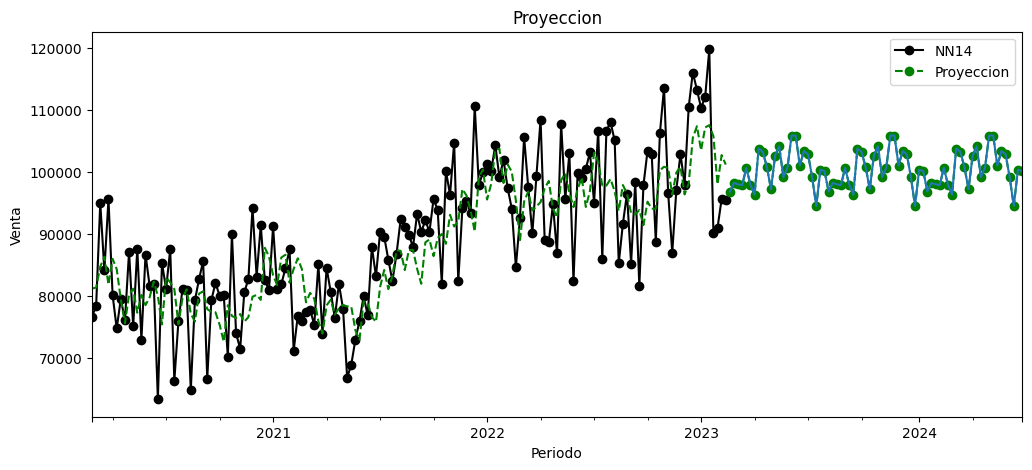

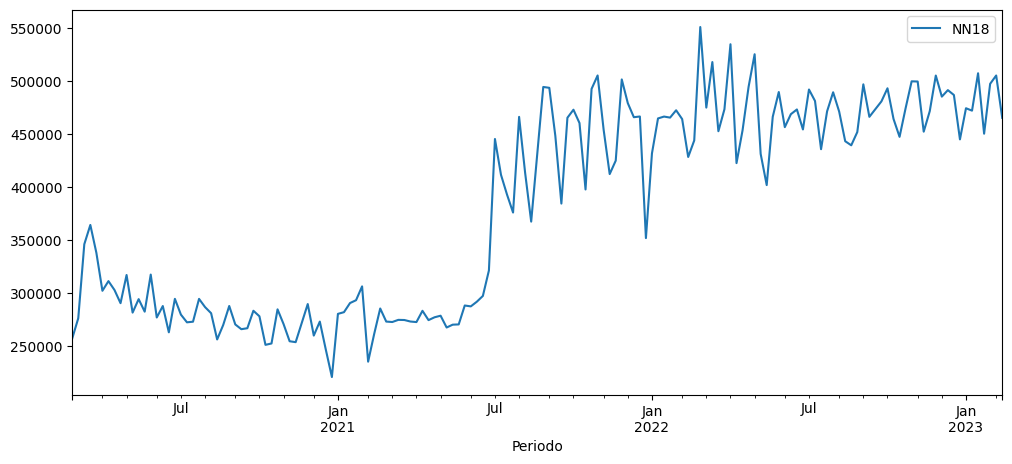

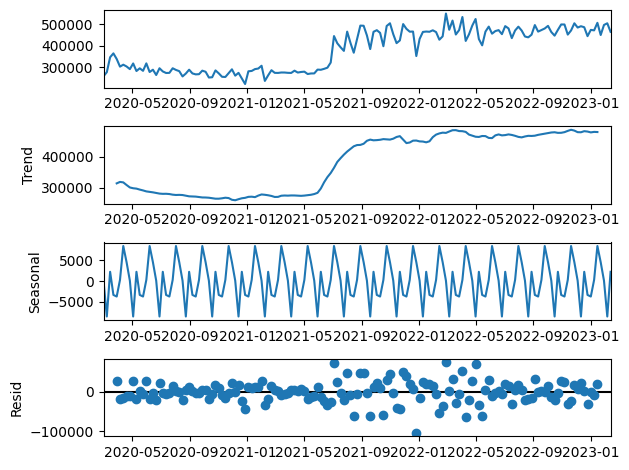

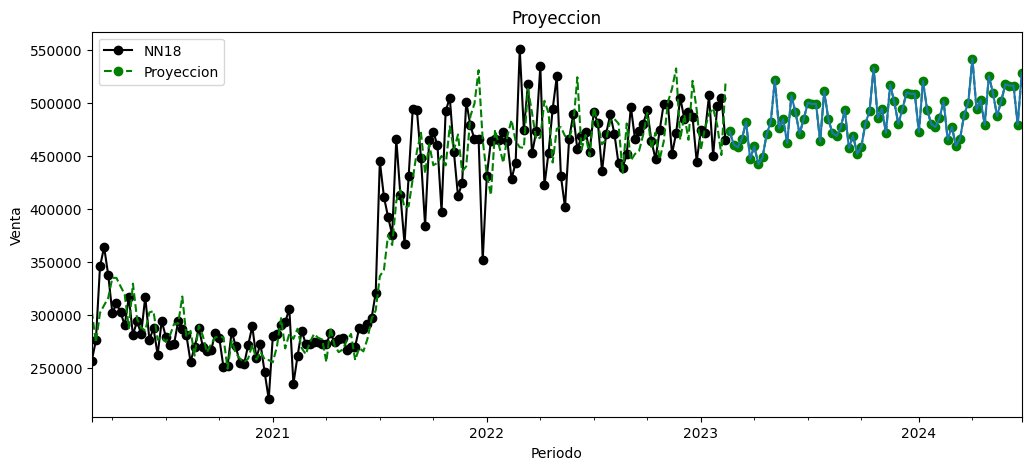

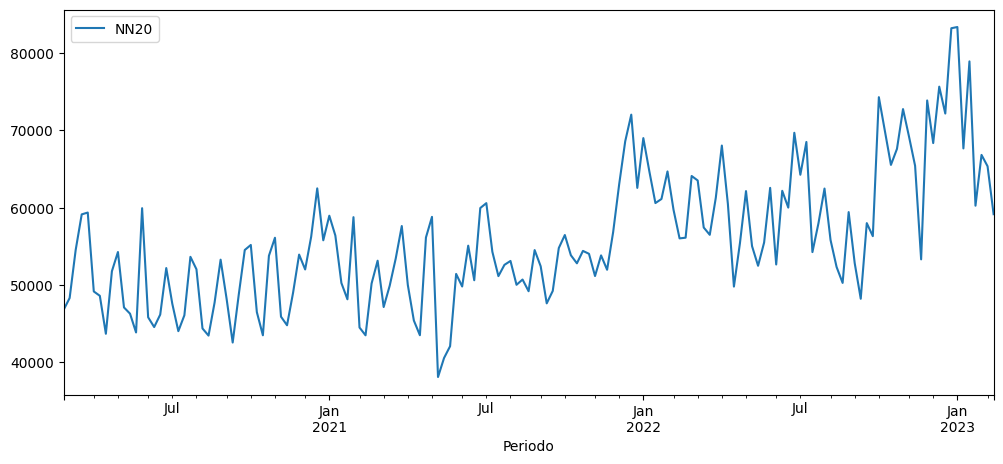

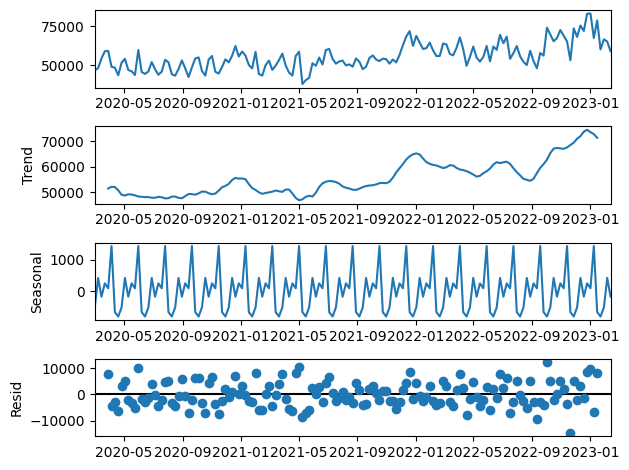

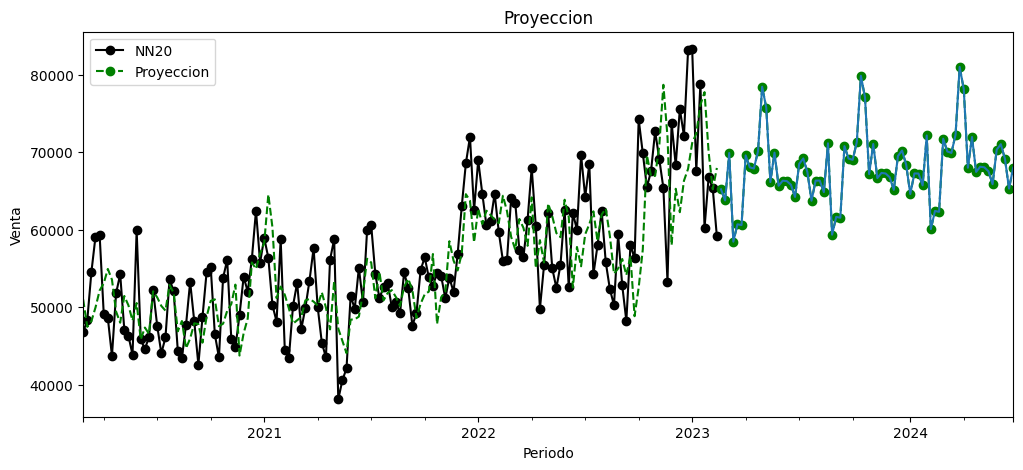

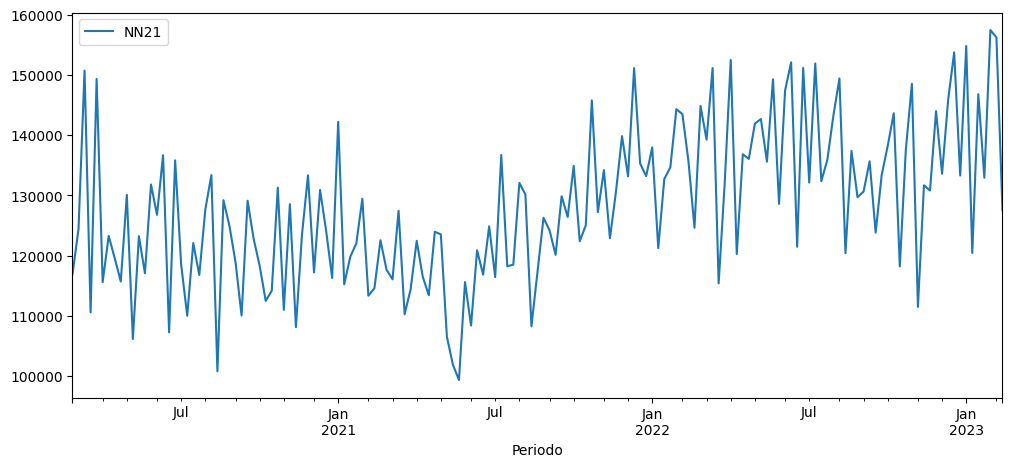

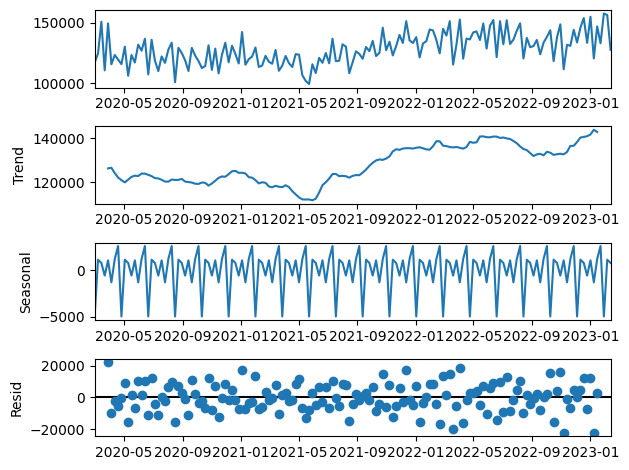

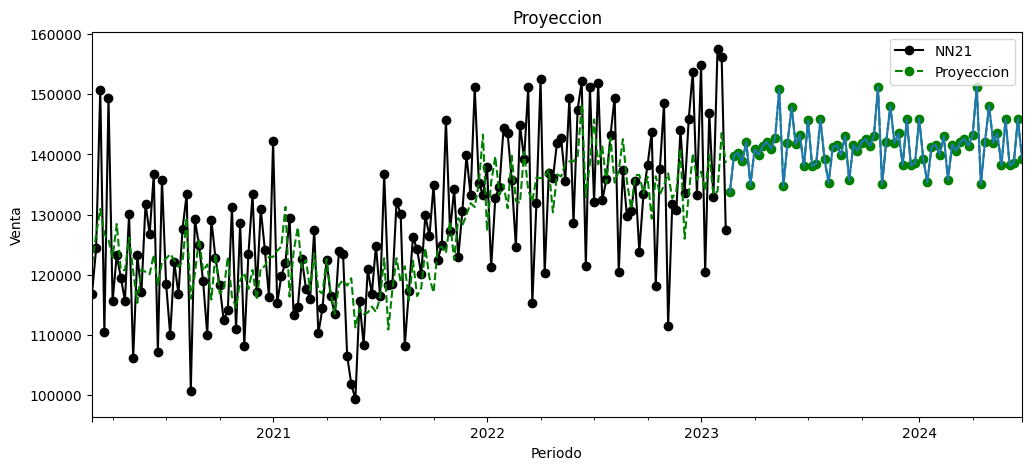

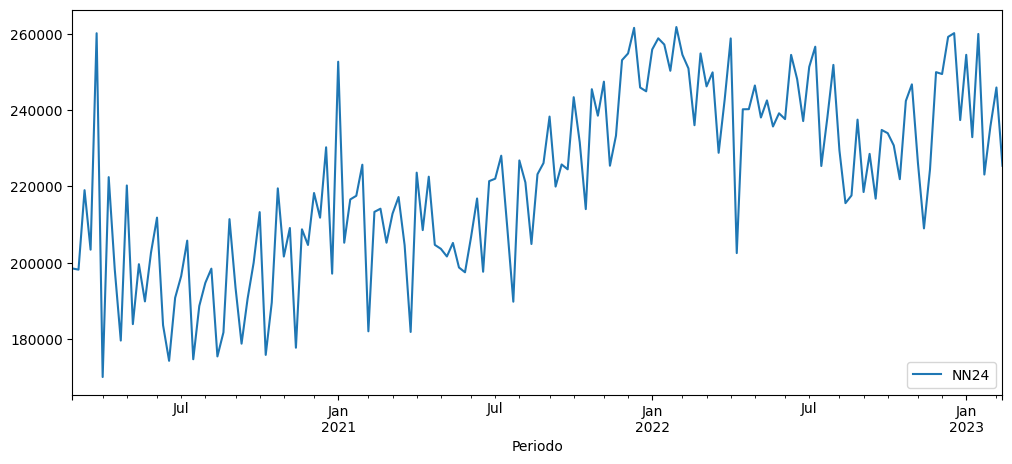

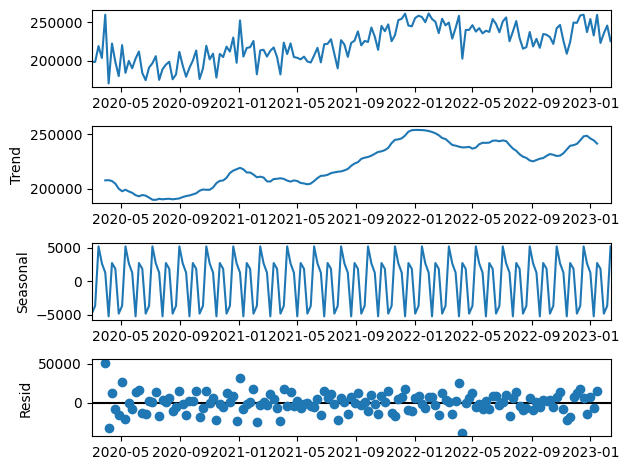

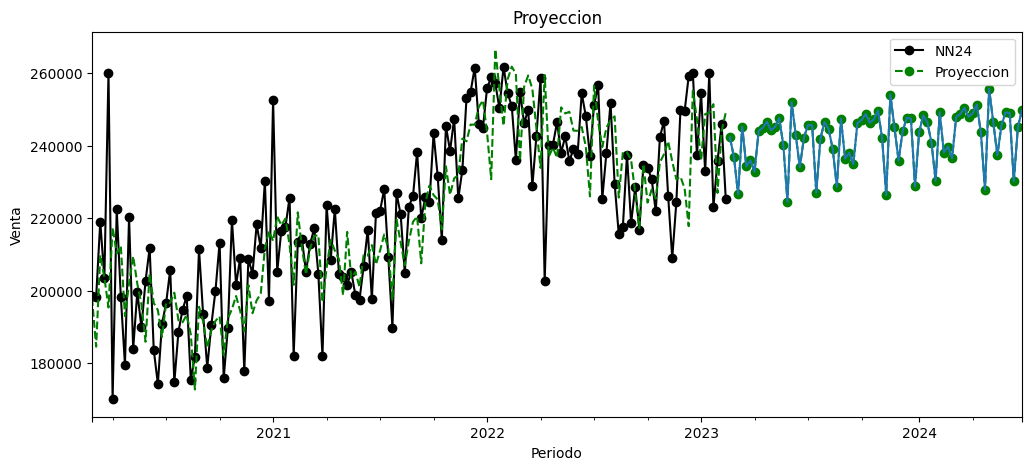

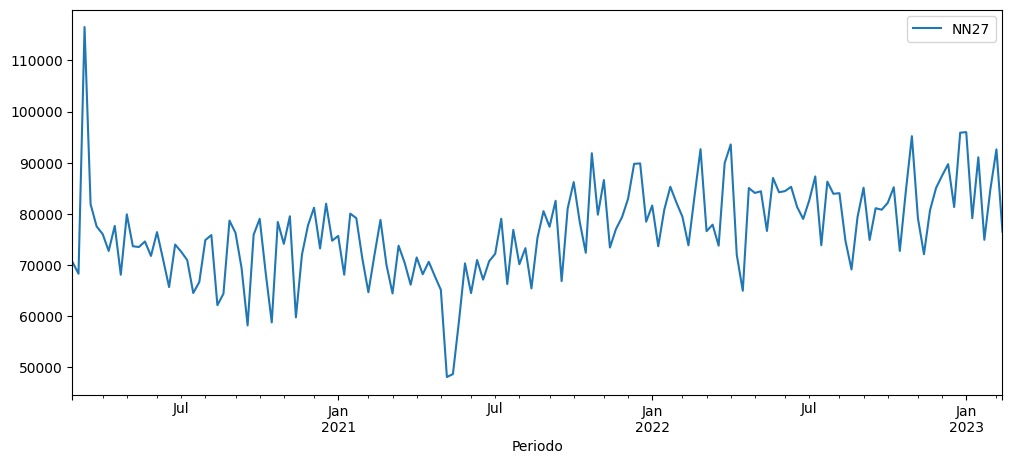

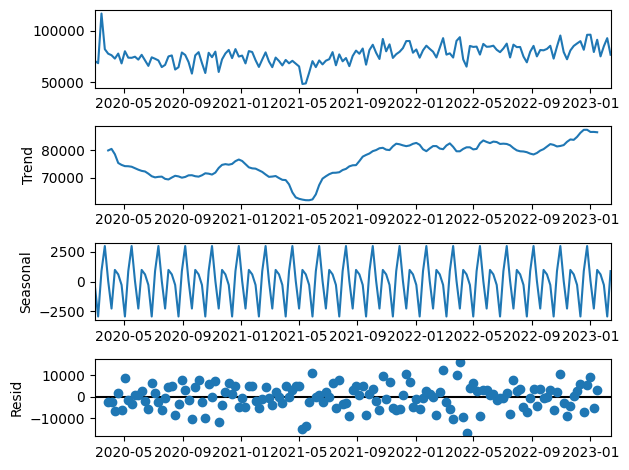

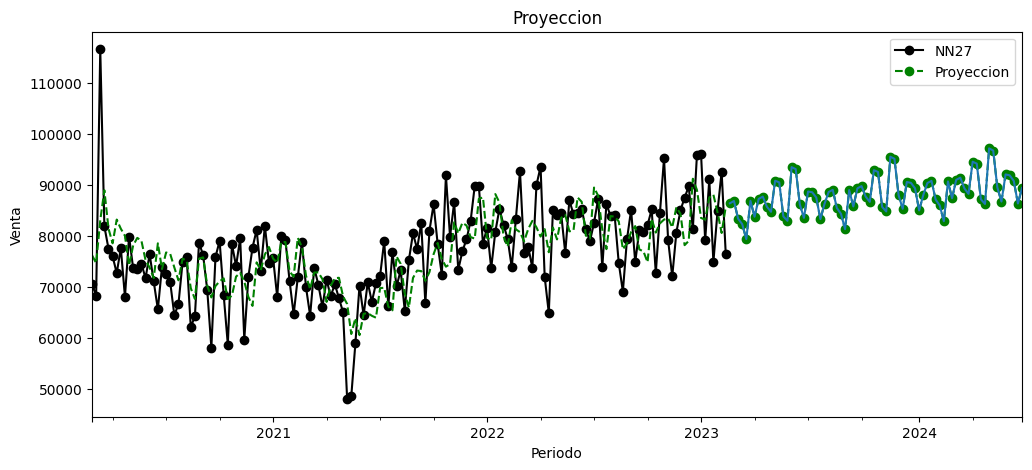

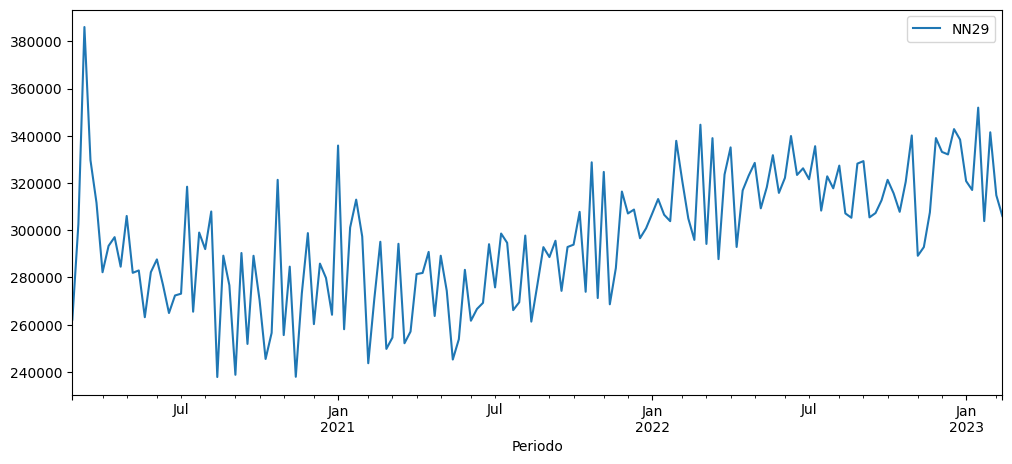

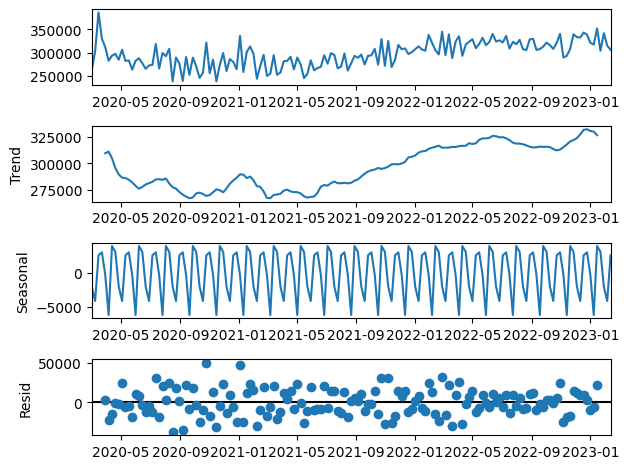

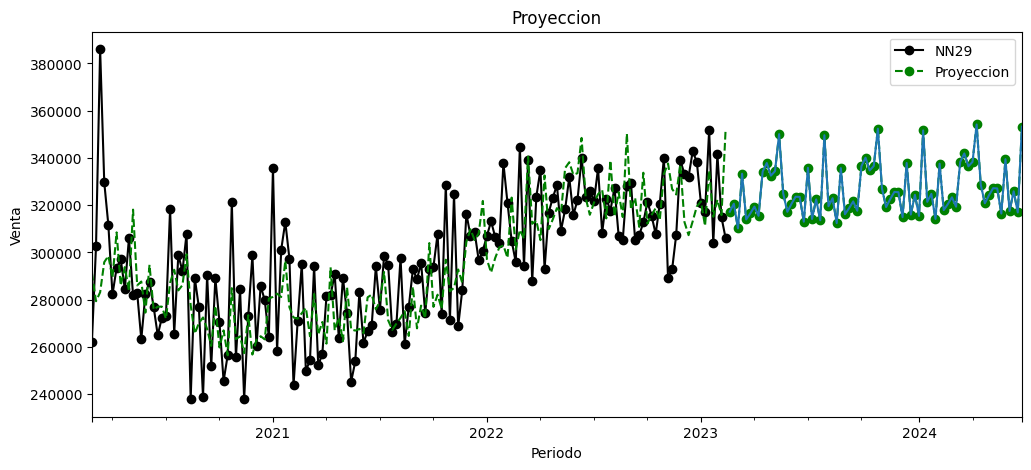

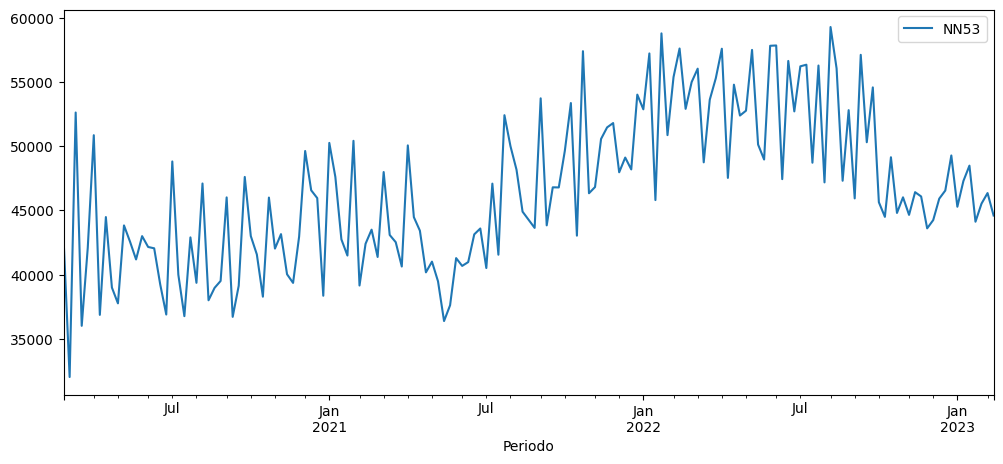

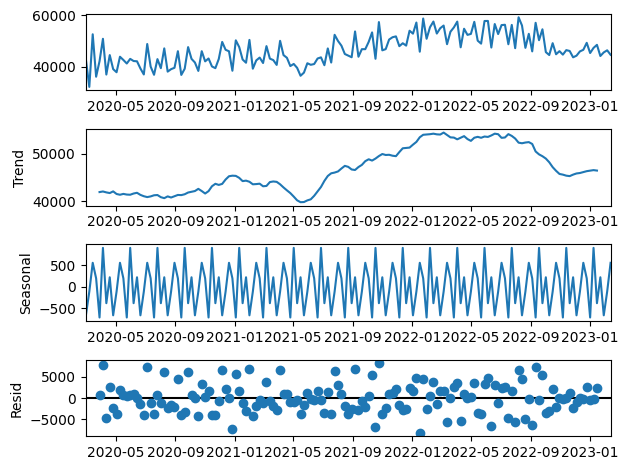

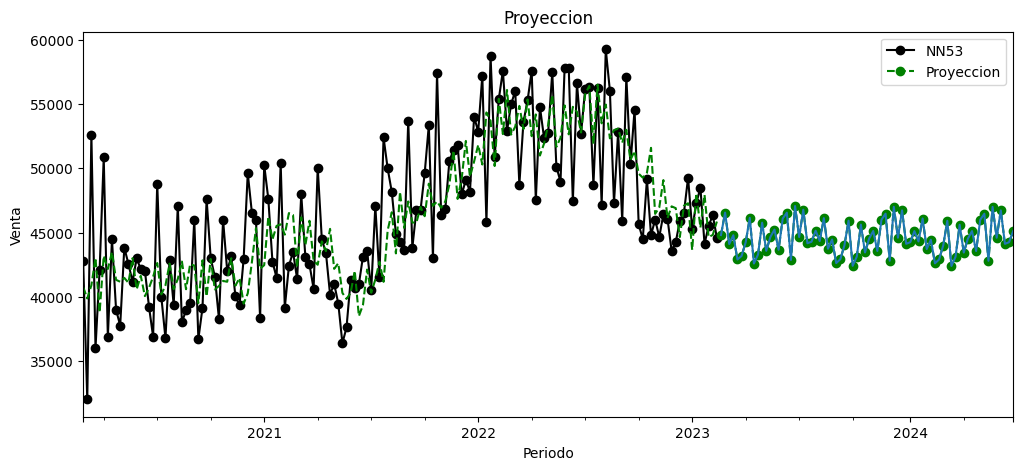

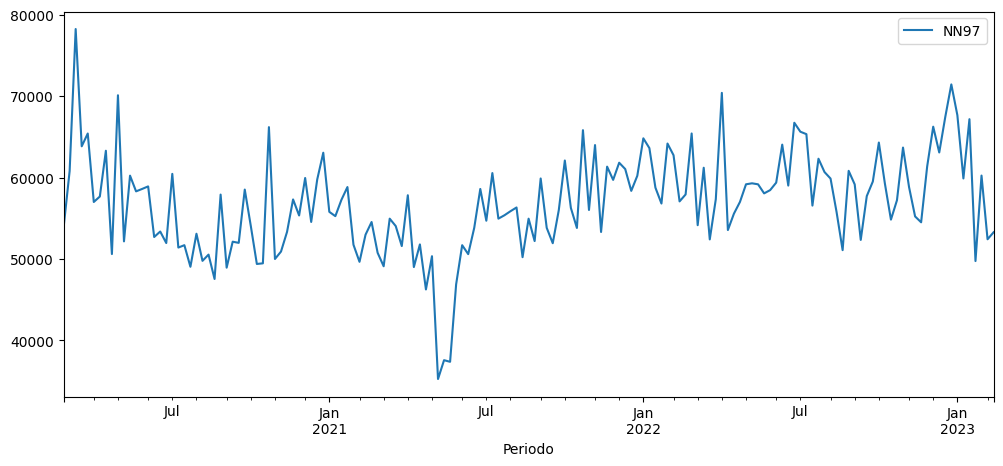

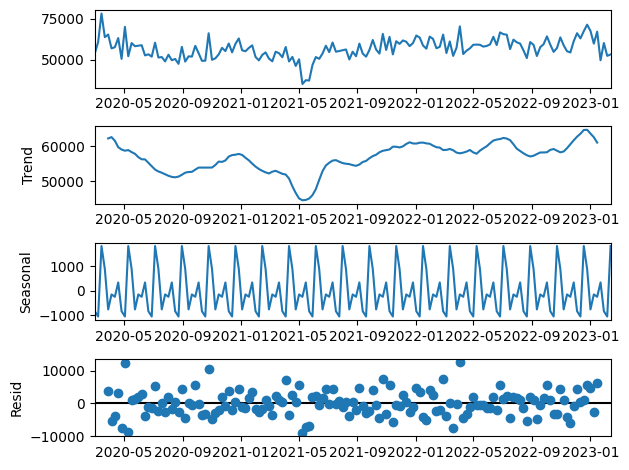

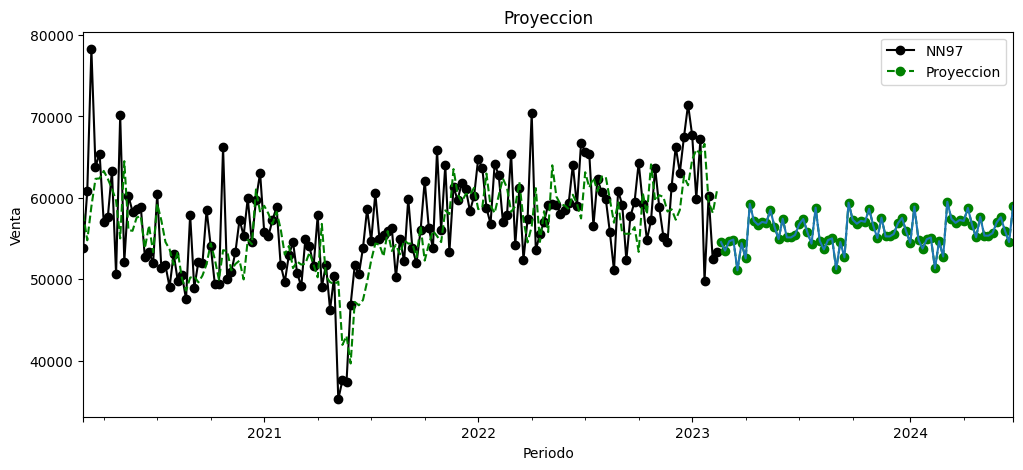

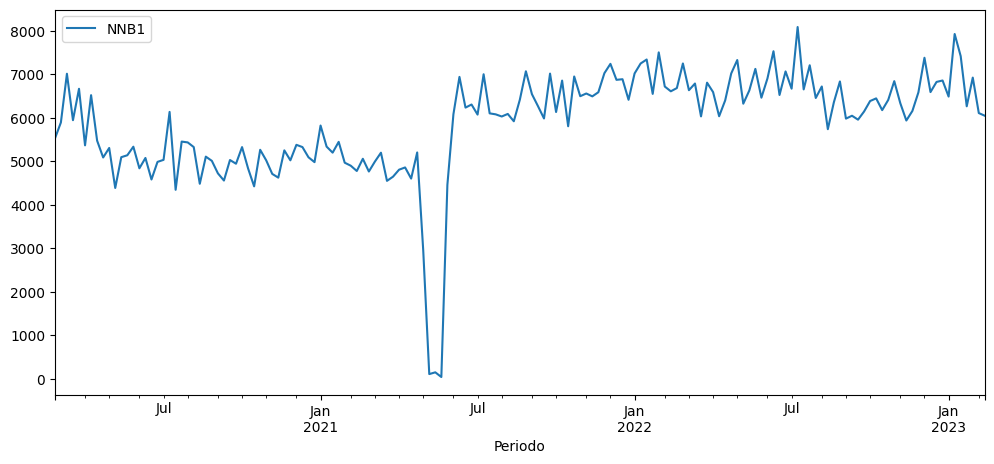

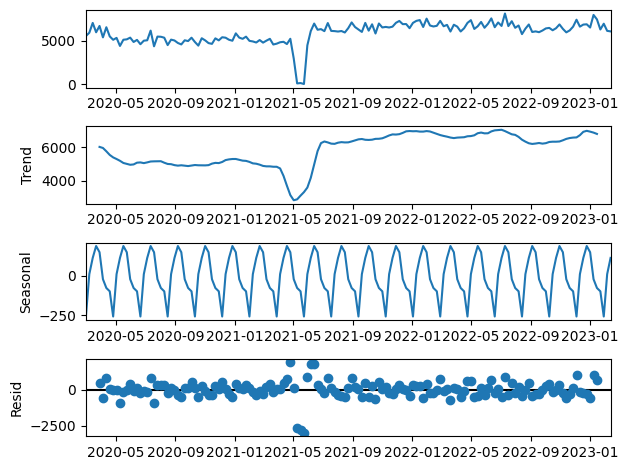

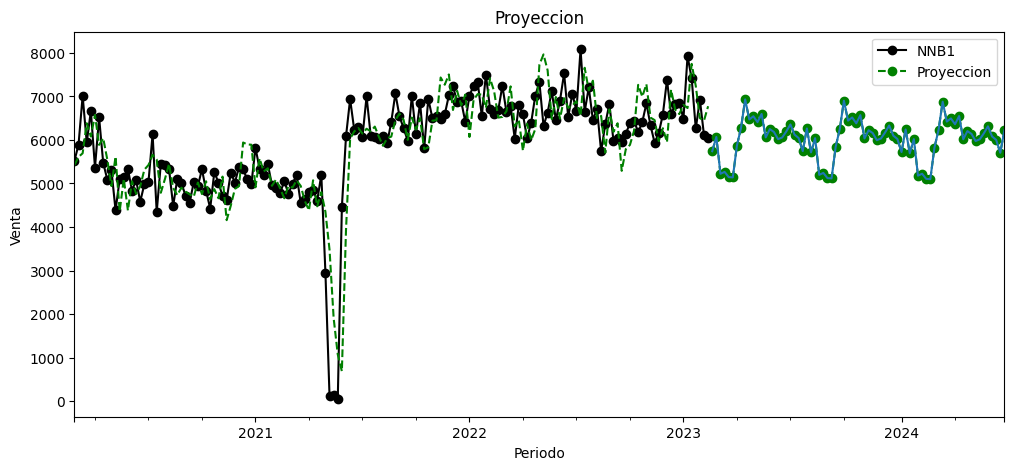

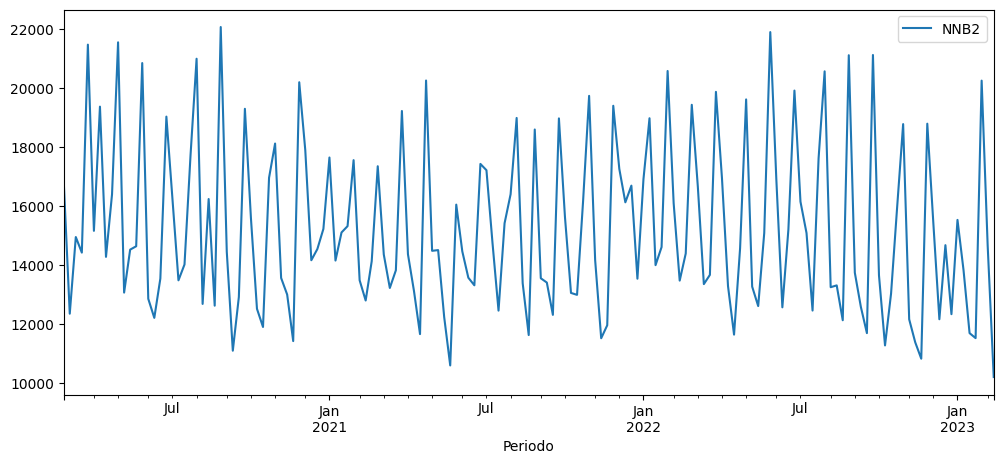

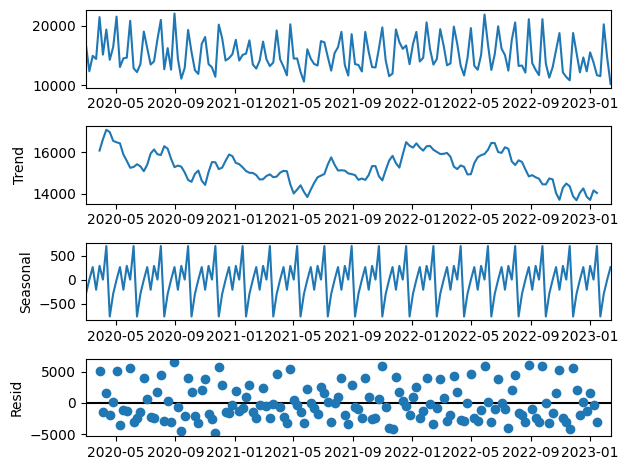

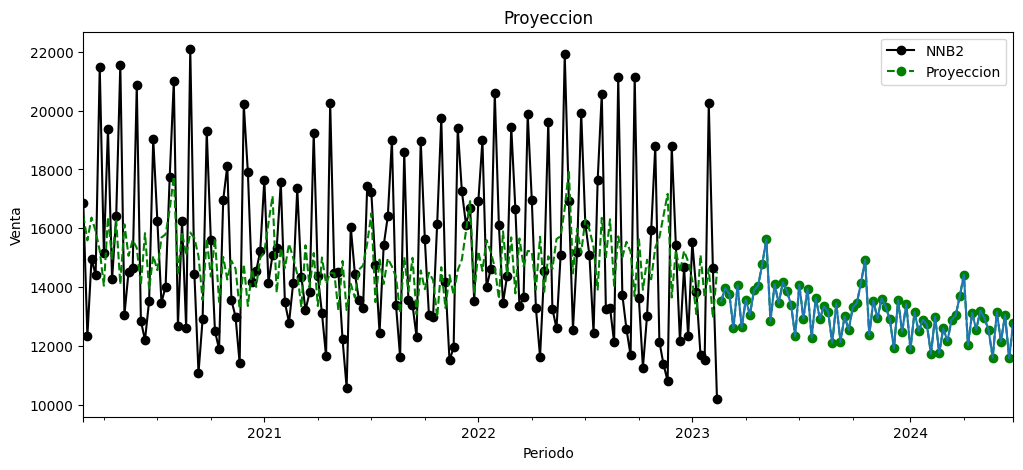

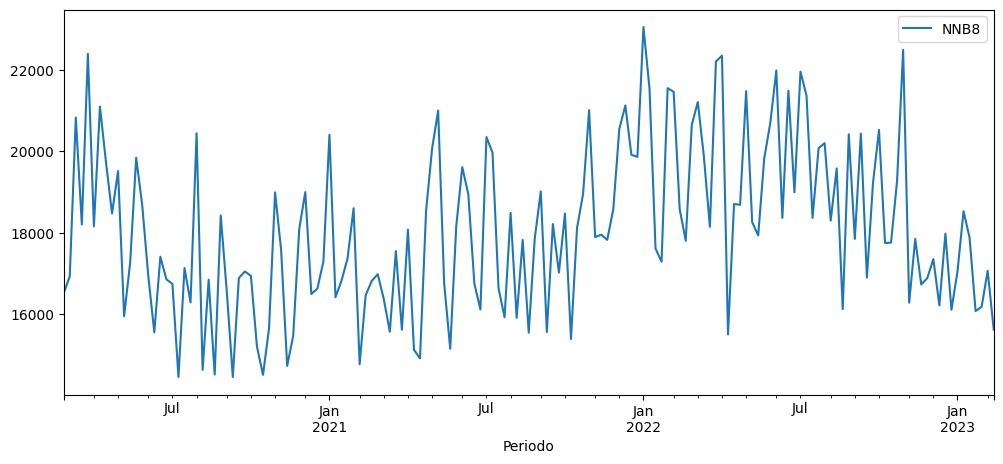

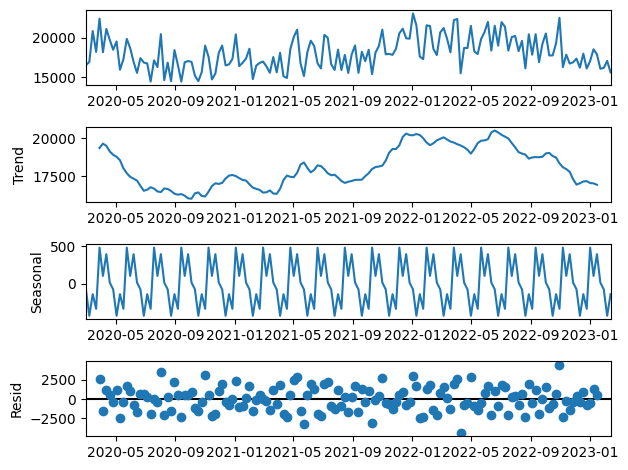

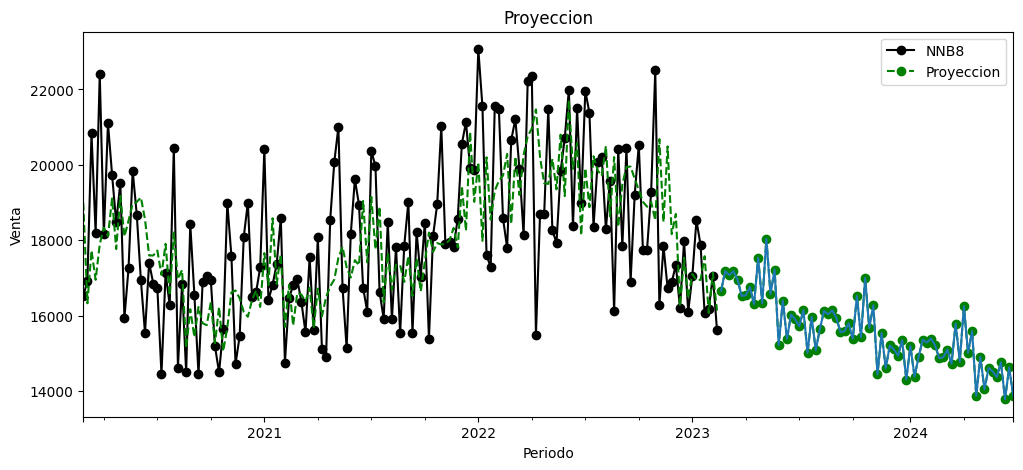

In [21]:
# Crea la proyeccion

df3 = df2

# Determina las columnas y hace la proyeccion 
for (columnName, columnData) in df3.items():
    #print('Column Name : ', columnName)
    #print('Column Contents : ', columnData.values)
    # Parametros personalizados
    ptrend = 'mul'
    pseasonal = 'mul'
    pdamped = True
    puse = True
    periodos = 24
    anormals = ["NNB2","NN20","NNB8","NN21"]

    if columnName in anormals:
        ptrend = 'add'
        pseasonal = 'add'
        pdamped = True
        puse = True
    if (columnName != 'Periodo') :
        print(columnName)
        try:
            df10 = df3[df3[columnName] > 0]
            df10 = df10[['Periodo', columnName]]
            df10 = df10.set_index('Periodo')
            df10.plot(figsize=(12, 5))
            # Analisis de descomposicion
            components = seasonal_decompose(df10, period=8)
            components.plot()
            # Proyeccion
            fit1 = ExponentialSmoothing(df10, seasonal_periods=periodos,trend=ptrend,seasonal=pseasonal,damped_trend=pdamped,use_boxcox=puse,initialization_method="estimated").fit()
            #print(fit1.summary())
            # Calcula el intervalo de confianza al 95% y lo salva
            xhat = fit1.forecast(steps= pproyeccion)
            z = 1.96
            sse = fit1.sse
            predint_xminus = xhat - z * np.sqrt(sse/len(df10))
            predint_xplus  = xhat + z * np.sqrt(sse/len(df10))

            df = [predint_xminus,predint_xplus]
            df = pd.DataFrame(df)
            df = df.transpose()
            col0 = columnName + "_minimo"
            col1 = columnName + "_maximo"

            # Changing columns name with index number
            mapping = {df.columns[0]: col0, df.columns[1]: col1}
            df = df.rename(columns=mapping)

            # Salva los intervalos
            mdir = os.path.join(dir_actual, Pais)
            mfila = vista + '-py_intervalo_'+columnName+'.xlsx'
            dirPath = os.path.join(mdir, mfila)
            df.to_excel(dirPath, index_label="Periodo")


            # Intervalo de confianza por simulacion
            simulations = fit1.simulate(pproyeccion, repetitions=1, error="add", random_errors=None)
            ax = df10.plot(figsize=(12, 5),marker="o",color="black",title="Proyeccion",)
            ax.set_ylabel("Venta")
            ax.set_xlabel("Periodo")
            fit1.fittedvalues.plot(ax=ax, style="--", color="green")
            fit1.forecast(steps=pproyeccion).rename("Proyeccion").plot(ax=ax, style="--", marker="o", color="green", legend=True )


            # Grafica la serie de Ajuste y la añade a fit1
            df6 = fit1.forecast(pproyeccion)
            df6.plot()
            df7 = fit1.predict(0)

            df8 = [df7,df6]

            df1 = (df0[[columnName]])

            df = pd.DataFrame(df8)
            df = df.transpose()
            col0 = columnName + "_ajuste"
            col1 = columnName + "_proyeccion"

            # Changing columns name with index number
            mapping = {df.columns[0]: col0, df.columns[1]: col1}
            df = df.rename(columns=mapping)
            # Salva la proyeccion normal
            mdir = os.path.join(dir_actual, Pais)
            mfila = vista + '-py_'+columnName+'.xlsx'
            dirPath = os.path.join(mdir, mfila)
            df.to_excel(dirPath, index_label="Periodo")

            # Calcula el Error por medio del MAPE
            df99 = [df7]
            yy = pd.DataFrame(df99)
            yy = yy.transpose()
            xx = pd.DataFrame(df10[[columnName]])
            print("MAPE " + columnName + " = " + str(mape(xx,yy)))
        except:
            pass

        


# Une la salida
df=[] 
mdir = os.path.join(dir_actual, Pais)
mfila = os.path.join(mdir, vista + "-py*")
files = glob.glob(mfila)
for a in files:

    df.append( pd.read_excel(a, sheet_name='Sheet1'))   

i = 0
for x in df:     
    if i > 0 :
        try:
            dt = pd.merge(dt, df[i])
        except:
            pass
    else :
        dt = df[0]
    i = i + 1
    
# Salva la proyeccion final de cada serie
mdir = os.path.join(dir_actual, Pais)
mfila = vista + '-final.xlsx'
dirPath = os.path.join(mdir, mfila)
dt.to_excel(dirPath)


In [22]:
# Salva las proyecciones agrupadas
mdir = os.path.join(dir_actual, Pais)
mfila = vista + '-final.xlsx'
dirPath = os.path.join(mdir, mfila)

orden = df0.columns.values


df1 = pd.ExcelFile(dirPath)
df2 = df1.parse("Sheet1")

df2['Periodo']= pd.to_datetime(df2['Periodo'])

df3 = df2[df2['Periodo'] > fecha_inicio ]

df3 = df3[df3.columns.drop(list(df3.filter(regex='_ajuste')))]

df3.columns = df3.columns.str.replace("_proyeccion", "")


df3 = df3[orden]


df3 = pd.DataFrame(np.concatenate([df0,df3],  axis = 0 ),columns=df0.columns)

mdir = os.path.join(dir_actual, Pais)
mfila = vista + '-Crecimientos.xlsx'
dirPath = os.path.join(mdir, mfila)
df3.to_excel(dirPath, index=False)


df4 = (df3.groupby(df3.Periodo.dt.year).sum())
# Salva la totalizacion de la proyeccion
mdir = os.path.join(dir_actual, Pais)
mfila = vista + '-Totales.xlsx'
dirPath = os.path.join(mdir, mfila)
df4.to_excel(dirPath, index_label="Periodo")
print("Termino")



Termino


In [23]:
mdir = os.path.join(dir_actual, Pais)

dft4 = pd.DataFrame()

orden = df0.columns.values
orden = orden[1:]
for el in orden:
    
    mfila = vista + "-py_"+el+".xlsx"
    proy = os.path.join(mdir, mfila)
    mfila = vista + "-py_intervalo_"+el+".xlsx"
    int = os.path.join(mdir, mfila)
    
    df1 = pd.read_excel(proy)
    df2 = pd.read_excel(int)

    df2['Periodo'] = pd.to_datetime(df2['Periodo'])
    df1['Periodo'] = pd.to_datetime(df1['Periodo'])
    df1=df1.drop(columns=[el + "_ajuste"])
    df3 = pd.merge(df1, df2, on="Periodo")


    df4 = (df3.groupby(df3.Periodo.dt.year).sum())
    df5 = df0[['Periodo', el]]
    df6 = (df5.groupby(df5.Periodo.dt.year).sum())
    df7 = pd.concat([df6,df4],axis=0)
    # Salva los intervalos de las proyecciones agrupadas
    mfila = vista+ "-"+ el +"-total-intervalos.xlsx"
    dirPath = os.path.join(mdir, mfila)
    df7.to_excel(dirPath)
    
    if i == 0:
        print(el)
        dft4 =df7
    else:
        dft4 = pd.concat([dft4,df7],axis=1)    
    
    print("Termino " + el)

dirPath = os.path.join(mdir, vista + "-Total-Intervalos.xlsx")
dft4.to_excel(dirPath)    


Termino NN13
Termino NN14
Termino NN18
Termino NN20
Termino NN21
Termino NN24
Termino NN27
Termino NN29
Termino NN53
Termino NN97
Termino NNB1
Termino NNB2
Termino NNB8


In [24]:
# Crecimientos

df99 = pd.read_excel(dirPath)
df99 = df99.fillna(0)

orden = df0.columns.values
orden = orden[1:]
for el in orden:

    promedio = el + "_proyeccion"
    minimo = el + "_minimo" 
    maximo = el + "_maximo" 

    esc1 = el + "_prom"
    esc2 = el + "_min"
    esc3 = el + "_max"
    # Suma los escenarios
    df99[esc1] = df99[el] + df99[promedio]
    df99[esc2] = df99[el] + df99[minimo]
    df99[esc3] = df99[el] + df99[maximo]

    # borra las columnas que ya no se necesitan
    del df99[el]
    del df99[promedio]
    del df99[minimo]
    del df99[maximo]

    dirPath1 = os.path.join(mdir, vista + "-Total-Intervalos_Anuales.xlsx")
    df99.to_excel(dirPath1,index=False)  

print("Termino")



Termino
